In [1]:
#imports 
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Create dataset for student performance
# Create a dictionary with the data
data = {
    'name': pd.Series(['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack',
                       'Katie', 'Liam', 'Mia', 'Nate', 'Olivia', 'Peter', 'Quinn', 'Rachel', 'Sam', 'Tyler']),
    'division': pd.Series(['A', 'B', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C',
                           'B', 'A', 'C']),
    'marks1': pd.Series([70, 80, 85, 90, 95, 65, 75, 60, 50, 85, np.nan, 55, 80, 70, 75, 40, 90, 80, 85, 65]),
    'marks2': pd.Series([60, 70, 75, 80, 85, 55, 65, 50, 40, 75, 80, 45, 70, 60, np.nan, 30, 80, 70, 75, 55]),
    'marks3': pd.Series([5, 60, 65, 70, 75, 45, 55, 40, 30, 65, 70, 35, 60, 50, 55, 20, 70, 60, np.nan, 45])
}


In [3]:
df = pd.DataFrame(data)


In [4]:
df.sample(7)


,name,division,marks1,marks2,marks3
1,Bob,B,80.0,70.0,60.0
17,Rachel,B,80.0,70.0,60.0
4,Emma,B,95.0,85.0,75.0
7,Henry,C,60.0,50.0,40.0
13,Nate,C,70.0,60.0,50.0
19,Tyler,C,65.0,55.0,45.0
3,David,C,90.0,80.0,70.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   division  20 non-null     object 
 2   marks1    19 non-null     float64
 3   marks2    19 non-null     float64
 4   marks3    19 non-null     float64
dtypes: float64(3), object(2)
memory usage: 928.0+ bytes


In [6]:
df.isna().sum()


name        0
division    0
marks1      1
marks2      1
marks3      1
dtype: int64

In [7]:
# Fill NaN values in marks1 with the mean of marks2 and marks3 for that row
df['marks1'].fillna(df[['marks2', 'marks3']].mean(axis=1), inplace=True)

# Fill NaN values in marks2 with the mean of marks1 and marks3 for that row
df['marks2'].fillna(df[['marks1', 'marks3']].mean(axis=1), inplace=True)

# Fill NaN values in marks3 with the mean of marks1 and marks2 for that row
df['marks3'].fillna(df[['marks1', 'marks2']].mean(axis=1), inplace=True)

In [8]:
df.isna().sum()



name        0
division    0
marks1      0
marks2      0
marks3      0
dtype: int64

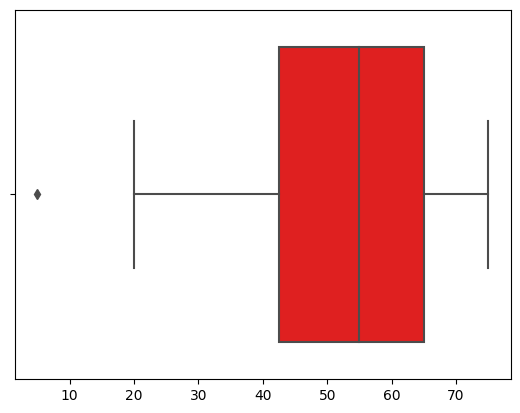

In [9]:

#Outlier present in 'marks3' can be visualized below
sns.boxplot(data= data, x= 'marks3', color= 'red');

In [10]:

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1
    # print(Q1,Q3,IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [11]:

outliers = detect_outliers_iqr(data['marks3'])
outliers

0    5.0
dtype: float64

In [12]:
data_wo_outliers = df[~df['marks3'].isin(outliers)]


In [13]:
data_wo_outliers



,name,division,marks1,marks2,marks3
1,Bob,B,80.0,70.0,60.0
2,Charlie,A,85.0,75.0,65.0
3,David,C,90.0,80.0,70.0
4,Emma,B,95.0,85.0,75.0
5,Frank,A,65.0,55.0,45.0
6,Grace,B,75.0,65.0,55.0
7,Henry,C,60.0,50.0,40.0
8,Ivy,B,50.0,40.0,30.0
9,Jack,A,85.0,75.0,65.0
10,Katie,C,75.0,80.0,70.0


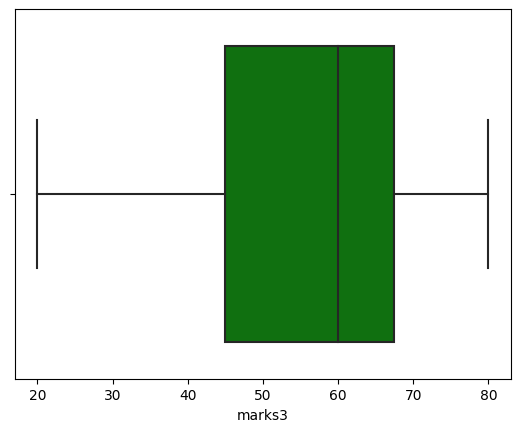

In [14]:
#outlier has been removed and this can be visualised by plot below
sns.boxplot(data= data_wo_outliers, x= 'marks3', color= 'green');


In [15]:

# Create a StandardScaler object
scaler = StandardScaler()


In [16]:
# Fit the scaler to the data and transform the data
df[['marks1', 'marks2', 'marks3']] = scaler.fit_transform(df[['marks1', 'marks2', 'marks3']])
